<div class="alert alert-block alert-info">
__16/16__ Ananya Sriram

# Donovan Feist

# CH EN 3603

# Homework 3 Problem 4

Consider a situation where we have evaporation from a beaker tube. We will study this problem in more detail soon. For now, I will give you the solution to the problem (species profiles and molar fluxes) and here you will analyze the results. The link on the class web page provides data for the mole fraction profiles, $x_i(z)$ with z in meters, as well as the molar fluxes of each species, $N_i \left (\frac{mol}{m^2 \cdot s} \right)$ , which are
constant. You may assume that the gas phase is at 298 K and 1 atm. The species are:
1. Acetone
2. Methanol
3. Air (Here we treat air as a single species. To determine its molecular weight, assume it is comprised of 21% $O_2$ and 79% $N_2$).

Using this data,
1. Plot $x_i(z)$ on a single plot. Plot $\omega_i(z)$ on a separate plot. Be sure to label axes and provide a legend.
2. Show the species velocities, $v_i(z)$. Be sure to also include the equation you use to determine these. Explain the behavior you observe. Hint: you may want to omit the last point from your plot - you will see why when you try to plot it.
3. Plot the mass-averaged velocity, v, and molar averaged velocity, vM as functions of z on the same plot. Include the equations you use to obtain these quantities. Discuss and explain your observations.
4. Plot the species molar diffusive fluxes relative to a molar averaged velocity, Ji. Also show the convective flux of each species.
    (a) What do you observe about the sum of convective and diffusive fluxes for each species?
    (b) Specifically for air, what do you observe about the convective versus diffusive fluxes?

## Part 1 Solution

### import the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

data = []

with open( 'data.csv' ) as csvfile:
    rows = csv.reader( csvfile )
    
    spnames = next(rows)
    spnames.pop(0)  # remove the first (blank) entry

    fluxes = next(rows)
    fluxes.pop(0)   # remove the first entry (title)

    next(rows)
    next(rows)
    for row in rows:
        data.append(row)


# convert data to numpy arrays
fluxes = np.asarray(fluxes,dtype=float)
data = np.asarray(data,dtype=float)

# # load the data.  Column 0: z, Column 1: Acetone, Column 2: Methanol, Column 3: Air
# data = np.genfromtxt('data.csv',delimiter=',',skip_header=4)
z = data[:,0]
x = data[:,1:]

ace=data[:,1]
meth=data[:,2]
air=data[:,3]

### plotting mole fraction (x)

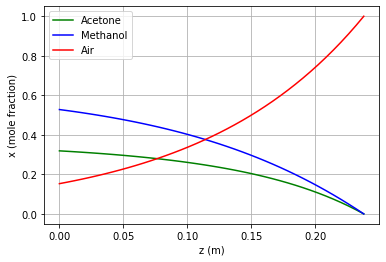

In [2]:
plt.plot(z,ace,'g',label='Acetone')
plt.plot(z,meth,'b',label='Methanol')
plt.plot(z,air,'r',label='Air')
plt.legend(loc='best')
plt.xlabel('z (m)')
plt.ylabel('x (mole fraction)')
plt.grid()
plt.show()

### plotting mass fraction ($\omega$)

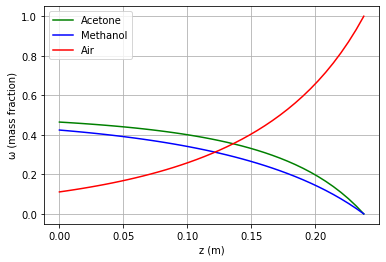

In [3]:
MWace=58.08 #g/mol
MWmeth=32.04 #g/mol
MWair=28.97 #g/mol
MWtot=ace*MWace+meth*MWmeth+air*MWair #g/mol

ωace=ace*MWace/MWtot
ωmeth=meth*MWmeth/MWtot
ωair=air*MWair/MWtot

plt.plot(z,ωace,'g',label='Acetone')
plt.plot(z,ωmeth,'b',label='Methanol')
plt.plot(z,ωair,'r',label='Air')
plt.legend(loc='best')
plt.xlabel('z (m)')
plt.ylabel('ω (mass fraction)')
plt.grid()
plt.show()

## Part 2 Solutions

To calculate the velocits of species i from the mole fraction of species i, the following steps must be done

## $v_i=\frac{N_i}{c_i}=\frac{N_i}{\frac{n_i}{V}}$

$n_i$ is calculated from the ideal gas law

$PV=x_i nRT \Rightarrow n=\frac{PV}{x_i RT} \Rightarrow$

$\frac{N_i}{\frac{n_i}{V}}=\frac{N_i}{\frac{\frac{x_i PV}{RT}}{V}}=\frac{N_i}{\frac{x_i P}{RT}}=\frac{N_i R T}{x_i P}=v_i$

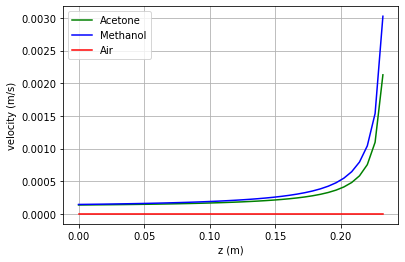

In [4]:
R=8.314 #J/(mol*K)
T=298 #K
P=101325 #Pa (also equal to 1 atm)

vace=fluxes[0]*R*T/(P*ace[0:-1])
vmeth=fluxes[1]*R*T/(P*meth[0:-1])
vair=fluxes[2]*R*T/(P*air[0:-1])

plt.plot(z[:-1],vace,'g',label='Acetone')
plt.plot(z[:-1],vmeth,'b',label='Methanol')
plt.plot(z[:-1],vair,'r',label='Air')
plt.legend(loc='best')
plt.xlabel('z (m)')
plt.ylabel('velocity (m/s)')
plt.grid()
plt.show()

The velocity for air stays the same because its flux is zero.

The velocity for acetone and methanol increase when z increases because the flux needs to remain constant. We showed in part 1 that the mass fraction of methanol and acetone are decreasing at higher values of z, so the velocities of methanol and acetone must increase to keep the fluxes constant.

## Part 3 Solution

The mass averaged velocity is calculated using the equation

$v_avg = \sum \omega_i v_i$.

The molar averaged velocity is calculated using the equation

$v_{M,avg} = \sum x_i v_i$.

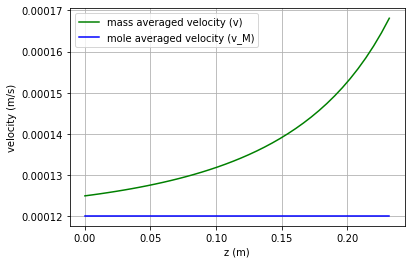

In [7]:
v=ωace[:-1]*vace+ωmeth[:-1]*vmeth+ωair[:-1]*vair
v_M=ace[:-1]*vace+meth[:-1]*vmeth+air[:-1]*vair

plt.plot(z[:-1],v,'g',label='mass averaged velocity (v)')
plt.plot(z[:-1],v_M,'b',label='mole averaged velocity (v_M)')
plt.legend(loc='best')
plt.xlabel('z (m)')
plt.ylabel('velocity (m/s)')
plt.grid()
plt.show()

The mole averaged velocity stays constant because the number of moles in each part of the tube is the same, so the average velocity of the total number of moles stays the same.

The mass averaged velocity increases with increasing z because the heavier species (acetone and methanol) are moving faster than the air at that height, causing the mass averaged velocity to increase.

# Part 4 Solution

The molar diffusive flux is calculated using the equation

$J_i=N_i-c x_i v_M$

We already know $N_i$ and $x_i$, and we already calculated $v_M$, making the calculation very straigtforward.

To calculate the convective flus, the following equation is used

convective flux of species i = $x_i c v_M$, where $c=\frac{P}{RT}$.

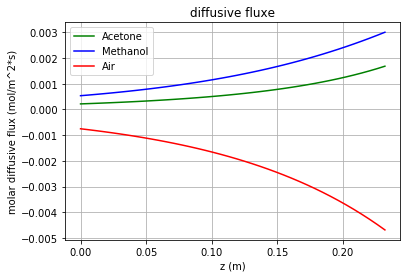

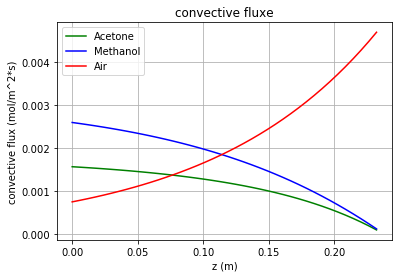

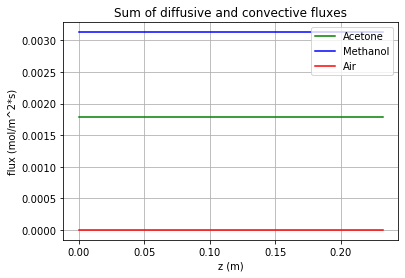

In [23]:
Jace=fluxes[0]-P/(R*T)*ace[:-1]*v_M
Jmeth=fluxes[1]-P/(R*T)*meth[:-1]*v_M
Jair=fluxes[2]-P/(R*T)*air[:-1]*v_M

plt.plot(z[:-1],Jace,'g',label='Acetone')
plt.plot(z[:-1],Jmeth,'b',label='Methanol')
plt.plot(z[:-1],Jair,'r',label='Air')
plt.legend(loc='best')
plt.xlabel('z (m)')
plt.ylabel('molar diffusive flux (mol/m^2*s)')
plt.title('diffusive fluxe')
plt.grid()
plt.show()

cface=ace[:-1]*P/(R*T)*v_M
cfmeth=meth[:-1]*P/(R*T)*v_M
cfair=air[:-1]*P/(R*T)*v_M

plt.plot(z[:-1],cface,'g',label='Acetone')
plt.plot(z[:-1],cfmeth,'b',label='Methanol')
plt.plot(z[:-1],cfair,'r',label='Air')
plt.legend(loc='best')
plt.xlabel('z (m)')
plt.ylabel('convective flux (mol/m^2*s)')
plt.title('convective fluxe')
plt.grid()
plt.show()

sumace=Jace+cface
summeth=Jmeth+cfmeth
sumair=Jair+cfair

plt.plot(z[:-1],sumace,'g',label='Acetone')
plt.plot(z[:-1],summeth,'b',label='Methanol')
plt.plot(z[:-1],sumair,'r',label='Air')
plt.legend(loc='best')
plt.xlabel('z (m)')
plt.ylabel('flux (mol/m^2*s)')
plt.title('Sum of diffusive and convective fluxes')
plt.grid()
plt.show()

### part a

I notice that the sum of the diffusive and convective fluxes are constant with increasing z. The constant values are equal to the constant fluxes that were given in the csv file.

### part b

Specifically for air, I notice that that the diffusive flux has the same value as the convective flux, but with the opposite sign. They are mirror copies of each other accross the x-axis.